<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/lantibiotics/blob/main/lantibiotics_heatmap_raw_2023_09_06_CYP_Aziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heat map

In [1]:
! pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.5 MB/s eta 0:00:00


In [2]:
import pandas as pd

# db = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/Lantibiotics_2021-09.fasta')

bee_13 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_13_S00_matches_cyp.tsv', sep='\t', header=None)
bee_20 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_20_S00_matches_cyp.tsv', sep='\t', header=None)
bee_25 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_25_S00_matches_cyp.tsv', sep='\t', header=None)
bee_33 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_33_S00_matches_cyp.tsv', sep='\t', header=None)
bee_41 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_41_S00_matches_cyp.tsv', sep='\t', header=None)
bee_4 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_4_S00_matches_cyp.tsv', sep='\t', header=None)
bee_66 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_66_S00_matches_cyp.tsv', sep='\t', header=None)
bee_75 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_75_S00_matches_cyp.tsv', sep='\t', header=None)

In [ ]:
bees_var = [bee_13, bee_20, bee_25, bee_33, bee_41, bee_4, bee_66, bee_75]
bees_names = ['bee_13', 'bee_20', 'bee_25', 'bee_33', 'bee_41', 'bee_4', 'bee_66', 'bee_75']

In [ ]:
from Bio import SeqIO
import requests
from io import StringIO

link = "https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/Lantibiotics_2021-09.fasta"
data = requests.get(link).text

fasta_iterator = SeqIO.parse(StringIO(data), "fasta")

lantibiotics_id_list = []

# Pretty print the fasta info
for seq in fasta_iterator:
  # print(seq.format("fasta"))
  lantibiotics_id_list.append(seq.id)

table_data = {#'№': range(1, len(lantibiotics_id_list) + 1),
              'Лантибиотик': [ str(i) for i in lantibiotics_id_list],
              # 'SM5_S9_R1_001': ['-'] * len(lantibiotics_id_list),
              # 'SM303_S24_R2_001': ['-'] * len(lantibiotics_id_list)
              }

In [ ]:
def bee_lantibiotics_data_preparation(bee, name, df):
  bee = bee.iloc[:, :3].sort_values(by=2).drop_duplicates(subset=[1])
  return df.join(
                 bee[[1, 2]].set_index(1).rename(columns={2: f'{name}'}),
                 how='outer'
                 )

def make_df_for_heatmap(var, names):

  df = pd.DataFrame(table_data).set_index('Лантибиотик')
  df.drop_duplicates(subset=['Лантибиотик'], keep='first', inplace=True)

  for be, nam in zip(var, names):
    df = bee_lantibiotics_data_preparation(be, nam, df)

  df.dropna(how='all', subset=df.columns.values[2:], inplace=True)
  return df

In [ ]:
df = make_df_for_heatmap(bees_var, bees_names)

<Axes: >

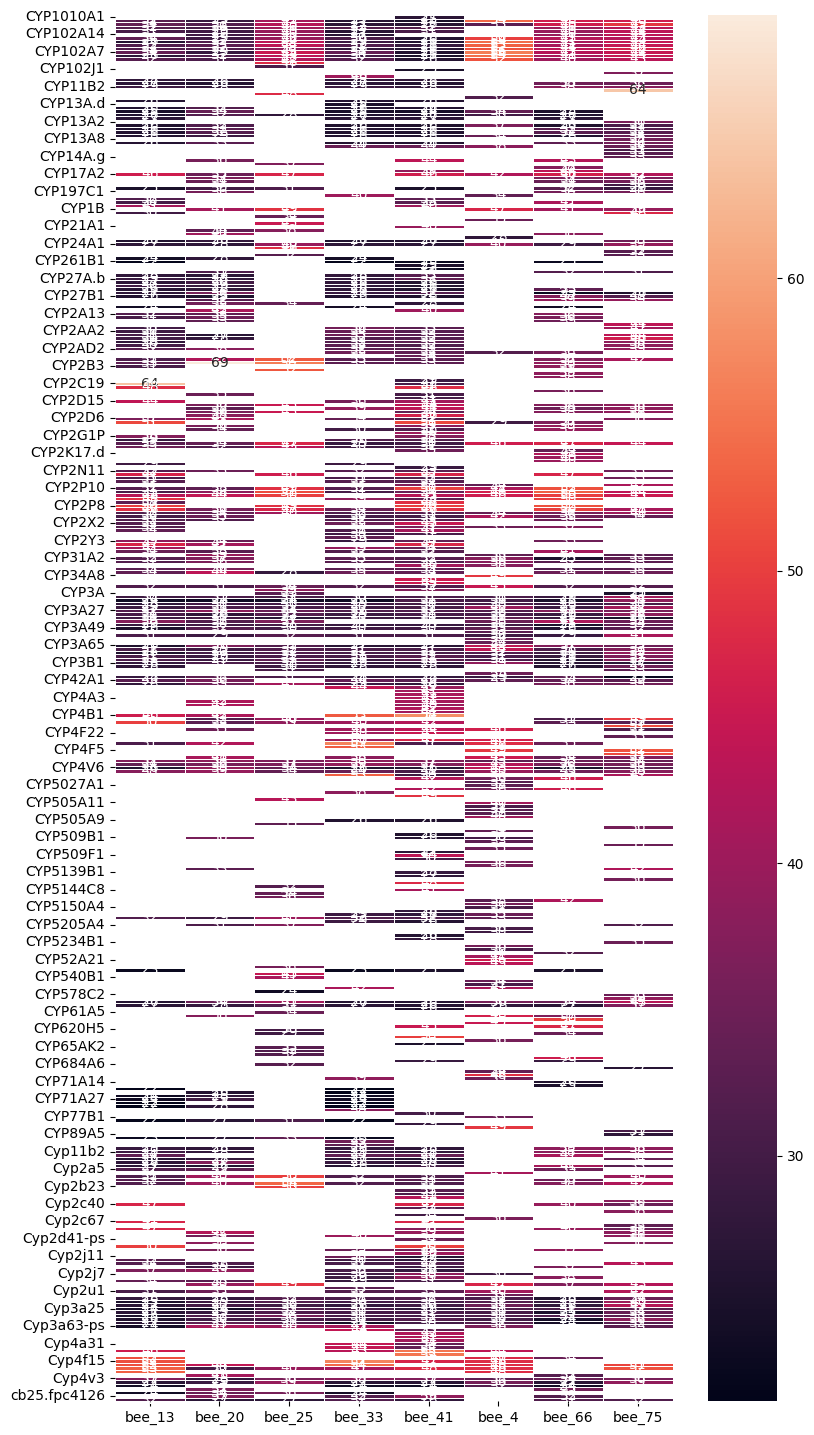

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 18))
sns.heatmap(df, annot=True, linewidths=.5, ax=ax)
#sns.heatmap(df, annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")
#sns.heatmap(df, annot=True, linewidths=.5, ax=ax, fmt="d")

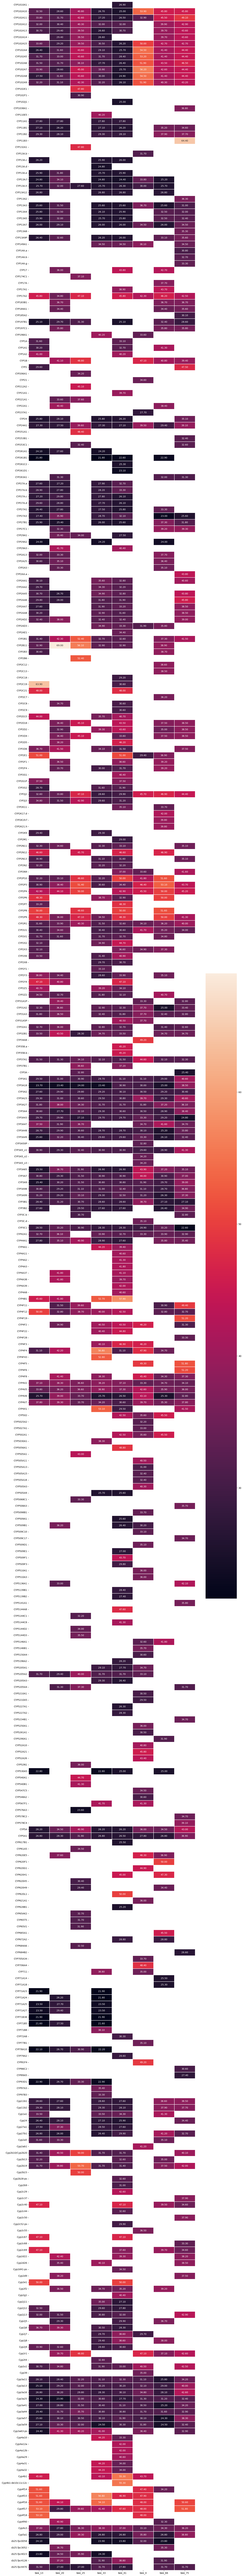

In [ ]:
num_rows, num_cols = df.shape
fig_width = max(10, num_cols * 2)
fig_height = max(8, num_rows * 0.5)

f, ax = plt.subplots(figsize=(fig_width, fig_height))
sns.heatmap(df, annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

plt.show()


<Axes: >

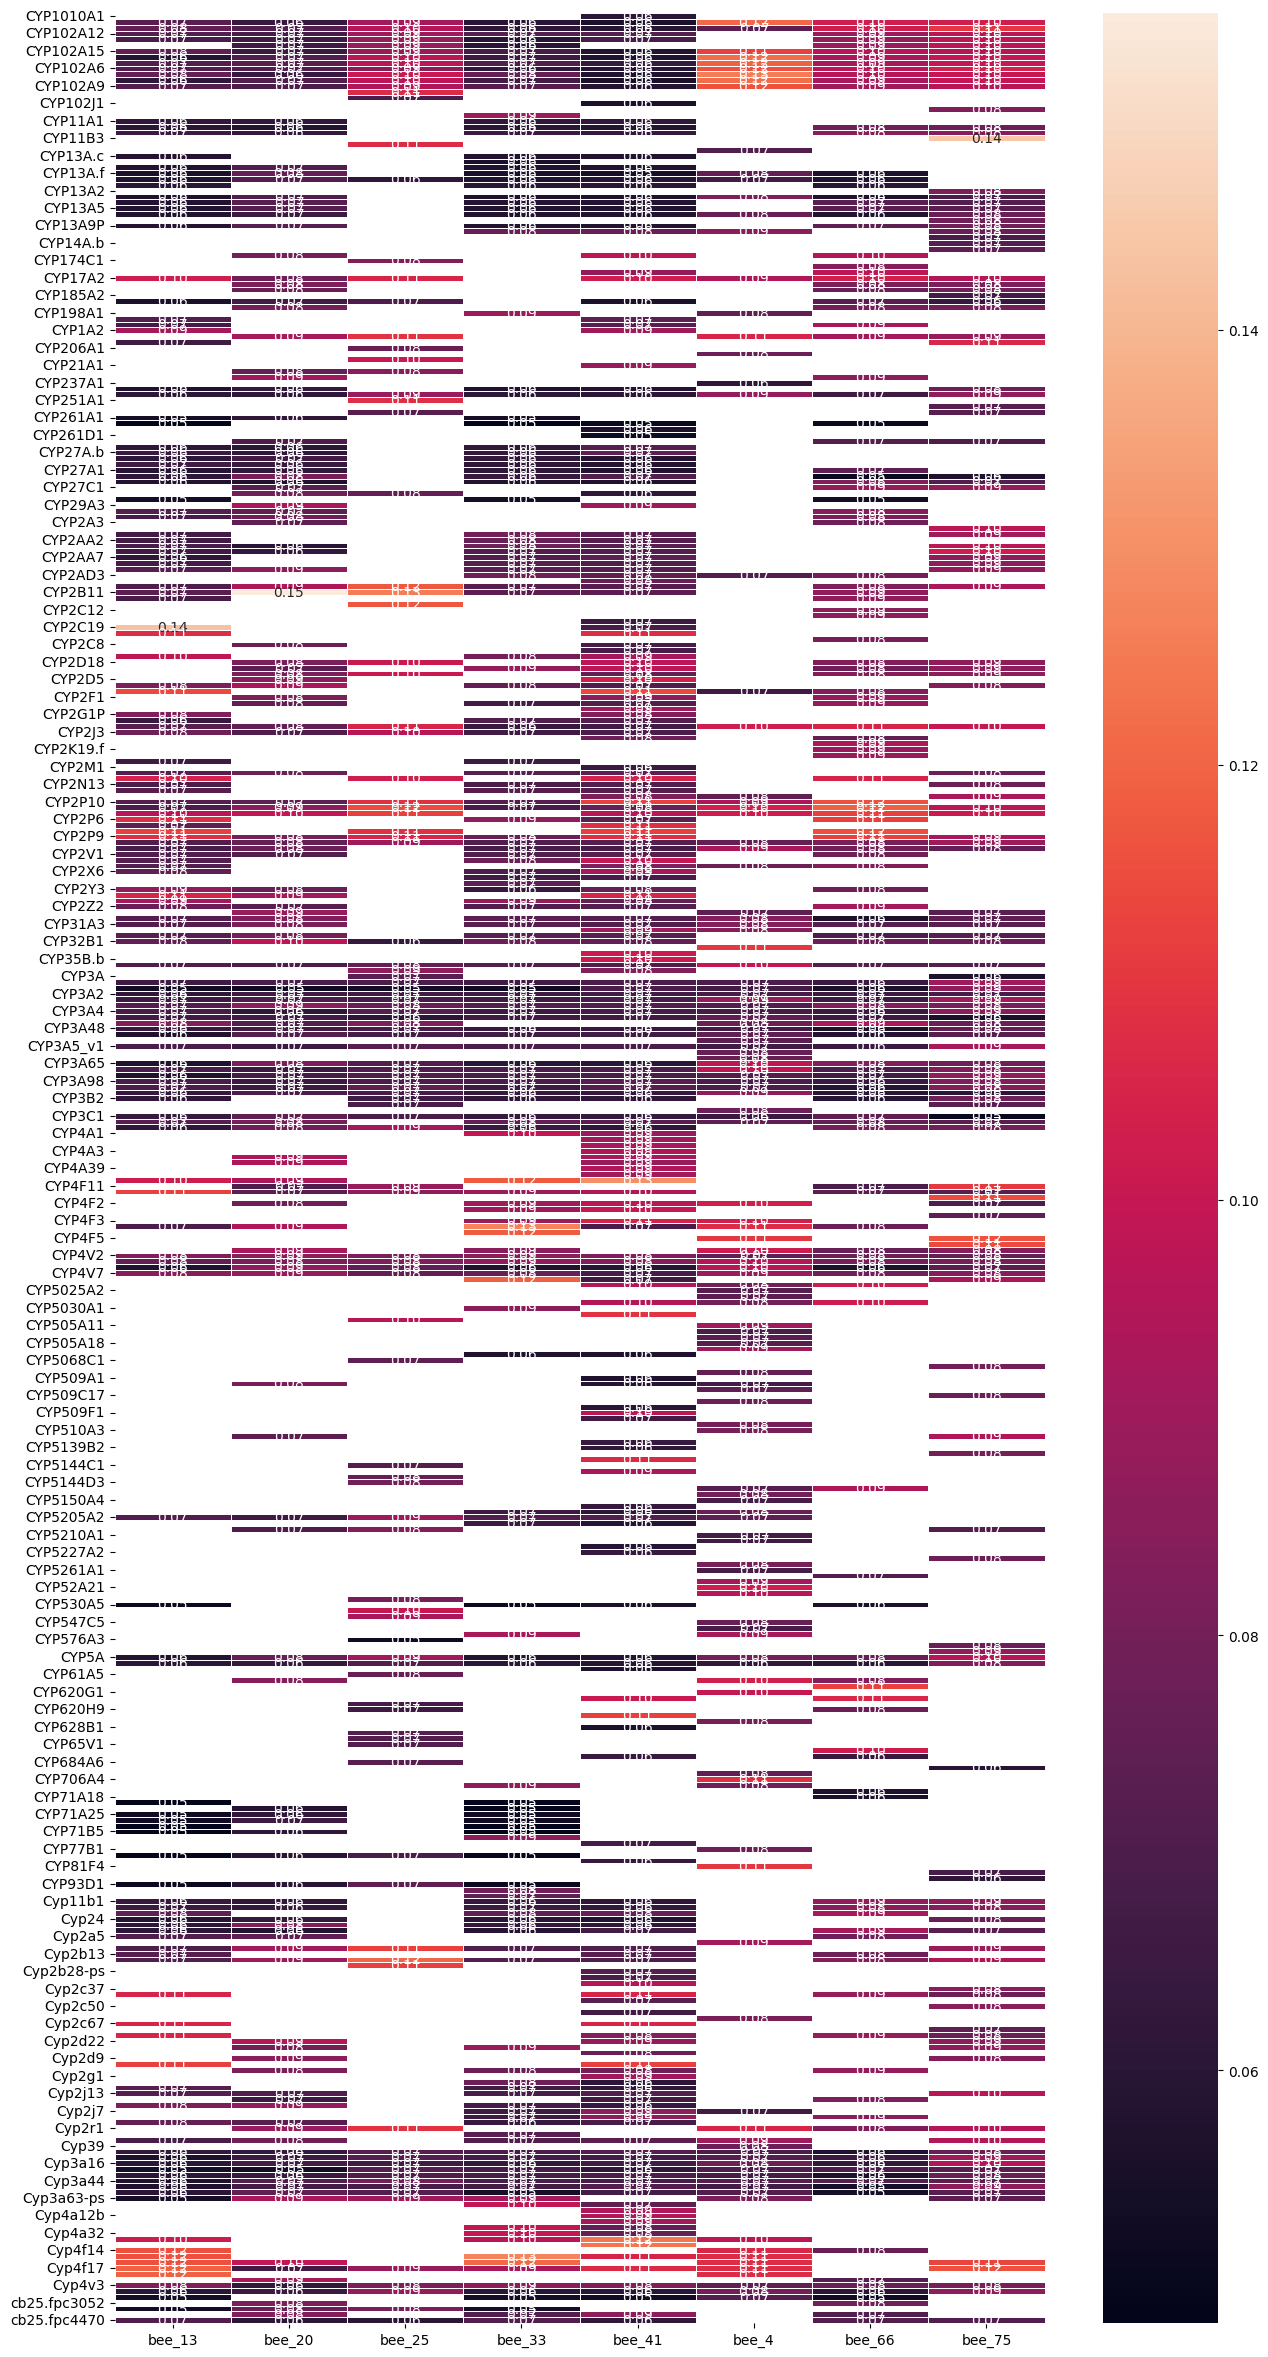

In [ ]:
# Вычисление процентного содержания
df_percent = df / df.sum().sum() * 100

# Отображение теплового графика
f, ax = plt.subplots(figsize=(15, 30))
sns.heatmap(df_percent, annot=True, linewidths=.5, ax=ax, fmt=".2f")


In [ ]:
link = "https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/Lantibiotics_2021-09.fasta"
data = requests.get(link).text
fasta_iterator = SeqIO.parse(StringIO(data), "fasta")

In [ ]:
lantibiotics_data = []
for seq in fasta_iterator:
    lantibiotics_data.append({'Лантибиотик': seq.id, 'Длина': len(seq.seq)})

In [ ]:
df_length = pd.DataFrame(lantibiotics_data)

In [ ]:
df = pd.merge(df, df_length, on='Лантибиотик', how='left')

KeyError: ignored